In [ ]:
# Check the effects of the adiabatic correction

In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicTrit")

In [2]:
import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt


In [3]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)


In [4]:
plt.figure(figsize=(5,5),dpi=250)
ms=np.linspace(0.1,4,100)
Potentials=[potentials.Silvera_Triplet,potentials.UnCorrectedSilvera_Triplet, potentials.TCorrectedSilvera_Triplet]
Labels=['Silvera (H Corrected)' ,'UnCorreted','Tritium Corrected ']
aVsMs=[]
i=0
for pot in Potentials:
    aVsM=[]
    for m in ms:
        mu=m*constants.DaltonInEV/2
        aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, pot, 'Radau')[-1]*constants.hcInEVAngstrom*100)
    aVsMs.append(np.array(aVsM))
    plt.plot(ms,aVsM,label=Labels[i])
    i=i+1

plt.xlabel("atom mass (Dalton)")
plt.ylabel("Scattering length (pm)")
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed')
plt.ylim(-10000,10000)
plt.xlim(0,4)
plt.legend(loc='lower left')
plt.savefig("./Plots/AdiabaticCorrElastic.png",bbox_inches='tight',dpi=250)


AttributeError: module 'potentials' has no attribute 'UnCorrectedSilvera_Triplet'

<Figure size 1250x1250 with 0 Axes>

(0.0, 4.0)

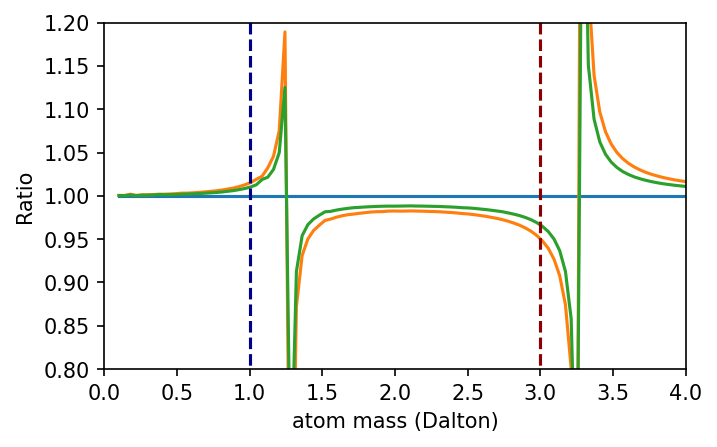

In [27]:
plt.figure(figsize=(5,3),dpi=150)
i=0
for a in aVsMs:
    plt.plot(ms,a/aVsMs[0],label=Labels[i])
    i=i+1
plt.xlabel("atom mass (Dalton)")
plt.ylabel("Ratio")
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed')
plt.ylim(0.8,1.2)
plt.xlim(0,4)


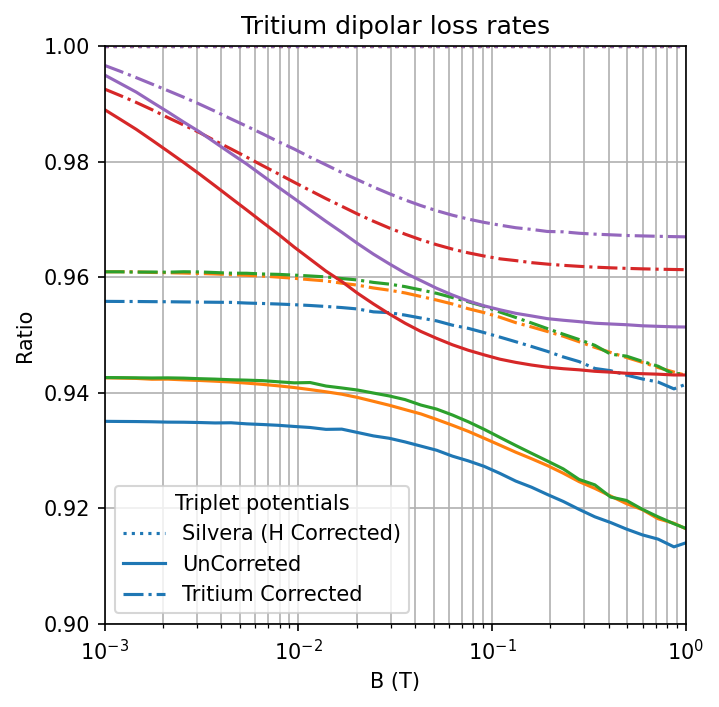

In [44]:
B_values = np.logspace(-3,1,50)
T        = 5e-4
Channels = [ ['a','a'],
             ['a','c'],
             ['a','d'],
             ['c','c'],
             ['c','d']]
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

linetypes=['-','-.','--',':']
plt.figure(figsize=(5,5),dpi=250)

ci=0
for c in Channels:
    LossesT=[]


    for pot in Potentials:
        LossesT.append(dipolelosses.GetGFactor(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,potential=pot,temp=T))
        pi=pi+1
    pi=0
    for l in range(0,len(LossesT)):
        if(ci==0):
            plt.plot(B_values,LossesT[l]/LossesT[0],linetypes[pi-1],color=colors[ci],label=Labels[pi])
        else:
            plt.plot(B_values,LossesT[l]/LossesT[0],linetypes[pi-1],color=colors[ci])
        pi=pi+1
    ci=ci+1
plt.xlabel("B (T)")
plt.xlim(0.001, 1)
plt.ylabel(r'Ratio')
plt.title("Tritium dipolar loss rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.semilogx()
plt.ylim(0.9,1.0)
plt.savefig("./Plots/AdiabaticCorrDipole.png",bbox_inches='tight',dpi=250)

plt.show()